
# SQUID memory dimensionning

## Laurent @IRAP

----

* Created 11/10/2021

This Notebook quantifies the number of values needed to store the SQUID tranfer function in the FPAsim firmware.

----


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
"""
Defining the SQUID transfer function
"""

def SQUID(x):
    a=np.array([2.40329e-06, 9.54011e-06])
    p=np.array([6.299441, -0.94834025, 0.39483974])

    return a[0]*np.sin(p[0]*(x+p[1])+p[2]*np.sin(p[0]*(x+p[1])))+a[1]

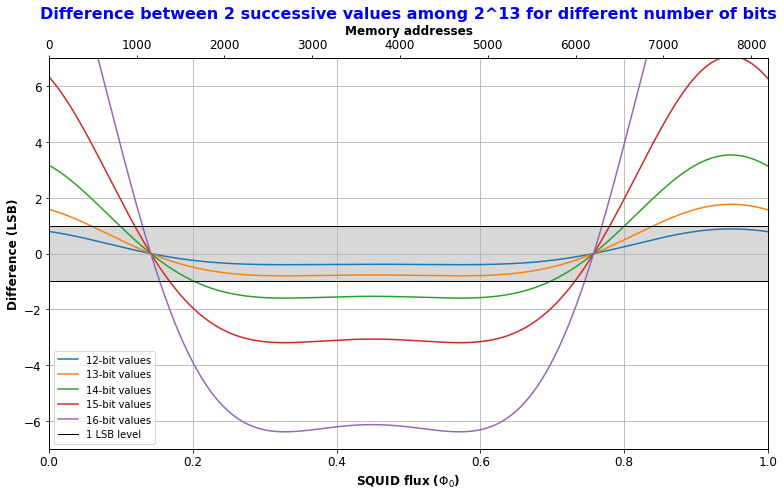

In [30]:
"""
Undersampling the SQUID transfer function 
"""
import matplotlib

# Defining one period of the transfer function over npts_per_period values.
def SQUID_undersamp(npts_per_period):
    x=np.arange(npts_per_period)/npts_per_period
    return SQUID(x)

# Sizing the tranfer function over nbits bits and measuring the "noise".
# This noise is the difference between successive values
def resolution_transfer_function(nvalues, nbits):
    TF=SQUID_undersamp(nvalues)
    TF=2**nbits*TF/TF.max()
    return TF[1:]-TF[:-1]

# plotting the noise
nvalues=2**13
fig=plt.figure(figsize=(11,7))
ax1=fig.add_subplot(1,1,1)
for nbits in range(5):
    ax1.plot(np.arange(nvalues-1)/nvalues, resolution_transfer_function(nvalues, 12+nbits), label="{0:2d}-bit values".format(12+nbits))
ax1.plot([0,1], [-1,-1], '-k', linewidth=1, label="1 LSB level")
ax1.plot([0,1], [1,1], '-k', linewidth=1)
ax1.add_artist(matplotlib.patches.Rectangle((0, -1), 1, 2, color = 'grey', alpha=0.3))
ax1.set_title("Difference between 2 successive values among 2^13 for different number of bits", color='blue')
ax1.set_xlabel("SQUID flux ($\Phi_0$)")
ax1.set_ylabel("Difference (LSB)")
ax1.legend(loc="best")
ax1.set_xlim(0, 1)
ax1.set_ylim(-7, 7)
ax1.grid()
ax2 = ax1.twiny()
ax2.set_xlim(0, 2**13)
ax2.set_xlabel("Memory addresses")
ax1.title.set_weight('bold')
ax1.title.set_fontsize(16)
for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_weight('bold')
    item.set_fontsize(12)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels()):
    item.set_fontsize(12)
fig.tight_layout()


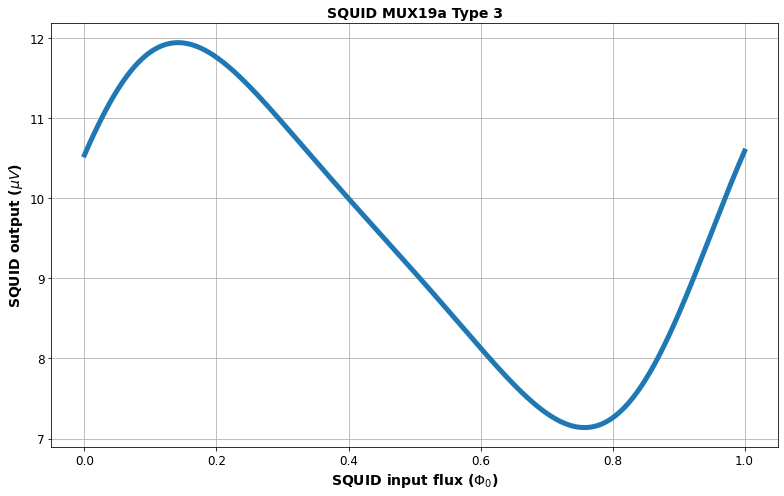

In [31]:
"""
Plotting the SQUID transfer function
"""
npts=2**24
x=np.arange(npts)/npts

fig=plt.figure(figsize=(11,7))
ax1=fig.add_subplot(1,1,1)

ax1.plot(x, SQUID(x)*1e6, linewidth=5)
ax1.set_xlabel('SQUID input flux ($\Phi_0$)')
ax1.set_ylabel('SQUID output ($\mu V$)')
ax1.set_title("SQUID MUX19a Type 3")
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_weight('bold')
    item.set_fontsize(14)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(12)
ax1.grid()
fig.tight_layout()
